In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import scipy as sp
from collections import defaultdict
from itertools import product
import gurobipy as gb
from gurobipy import GRB

repeats = json.load(open('../cleanerdata/repeats.json'))
repeats = {int(k):v for k,v in repeats.items()}

locdem = pd.read_excel('../cleanerdata/locdem.xlsx')

q = locdem['Number of pallets'].to_numpy().astype(float).tolist()
q = [0] + q
q.extend([v['dem'] for v in repeats.values()])

locs = pd.read_excel('../cleanerdata/locations.xlsx')
longs, lats = locs['long'].to_numpy().tolist(), locs['lat'].to_numpy().tolist()
longs.extend([longs[v['map']] for v in repeats.values()])
lats.extend([lats[v['map']] for v in repeats.values()])

distmat = pd.read_json('../cleanerdata/distmat.json').to_numpy()
timemat = pd.read_json('../cleanerdata/timemat.json').to_numpy()
def get(i):
    try:
        i = repeats[i]['map']
    except KeyError:
        pass
    return i

def cost(i,j):
    i,j = get(i), get(j)
    return distmat[i,j]
def time(i,j):
    i,j = get(i), get(j)
    return timemat[i,j]

def location(i):
    return longs[i], lats[i]

In [2]:
loops = json.load(open('./loops.json'))

In [3]:
loops

[[0, 173, 109, 112, 1, 45, 0],
 [0, 28, 93, 2, 66, 123, 0],
 [0, 69, 120, 61, 60, 3, 0],
 [0, 40, 4, 153, 151, 152, 0],
 [0, 5, 34, 163, 71, 97, 0],
 [0, 128, 129, 108, 6, 86, 0],
 [0, 58, 102, 47, 7, 16, 0],
 [0, 172, 43, 111, 8, 27, 0],
 [0, 131, 67, 9, 68, 124, 0],
 [0, 156, 155, 176, 62, 10, 0],
 [0, 84, 75, 110, 11, 51, 0],
 [0, 171, 81, 132, 88, 12, 0],
 [0, 65, 99, 13, 74, 20, 0],
 [0, 42, 14, 158, 157, 126, 0],
 [0, 55, 165, 79, 15, 104, 0],
 [0, 175, 50, 17, 56, 63, 0],
 [0, 18, 36, 114, 140, 174, 0],
 [0, 119, 87, 19, 95, 178, 0],
 [0, 122, 21, 180, 117, 57, 0],
 [0, 167, 22, 26, 115, 106, 0],
 [0, 121, 100, 76, 23, 179, 0],
 [0, 168, 166, 107, 105, 24, 0],
 [0, 25, 177, 77, 127, 125, 0],
 [0, 159, 94, 53, 29, 54, 0],
 [0, 91, 30, 83, 80, 90, 0],
 [0, 136, 137, 138, 31, 33, 0],
 [0, 32, 113, 133, 134, 135, 0],
 [0, 89, 103, 35, 169, 130, 0],
 [0, 59, 37, 141, 139, 48, 0],
 [0, 38, 116, 145, 146, 147, 0],
 [0, 39, 52, 148, 149, 150, 0],
 [0, 41, 142, 143, 144, 154, 0],
 [0, 17

Text(0, 0.5, 'Latitude')

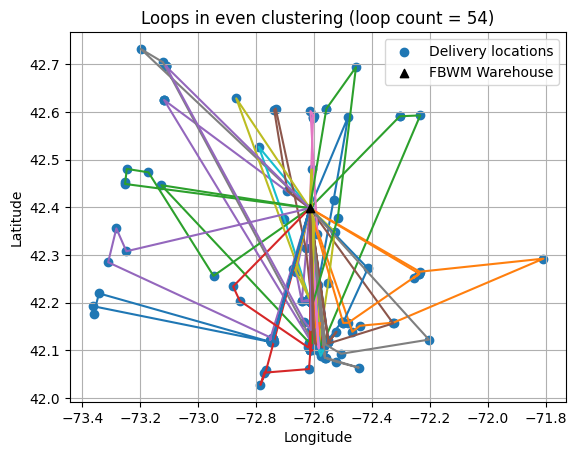

In [4]:
for loop in loops:
    '''paths = []
    for i in range(0,len(loop) - 1):
        paths.append((loop[i], loop[i+1]))'''
    locs = np.array(list([location(i) for i in loop]))
    plt.plot(locs[:,0], locs[:,1])
plt.grid()
plt.scatter(longs, lats, label='Delivery locations')
plt.scatter(longs[0], lats[0], marker='^', color='black', zorder = 5, label='FBWM Warehouse')
plt.title('Loops in even clustering (loop count = 54)')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [5]:
len(loops)

36